# **CAR PRICE DATASET ANALYSIS**
##### Project ini akan menganalisis dataset car price untuk ditemukan beberapa insight di dalamnya. Dataset didapatkan dari link ini https://www.kaggle.com/datasets/mrsimple07/car-prices-prediction-data.

## **Business Understanding**
##### Dealer mobil Yahaha memiliki dataset penjualan mobil bulan lalu. Dealer mobil ini meminta data scientistnya untuk mengolah datanya untuk menemukan insight-insight yang masih tersembunyi. Analisis ini akan menjawab beberapa pertanyaan berikut, yaitu a. Berapa banyak perusahaan yang menjual mobilnya di dealer ini?, b. Apa model mobil yang paling banyak terjual?, c. Berapa rata-rata jarak tempuh mobil yang terjual di dealer ini?, d. Bagaimana hubungan antara jarak tempuh mobil dengan harganya? gunakan metode linear regression untuk menentukan hubungannya! 

## **Data Understanding**

In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset
data = pd.read_csv('CarPricesPrediction.csv')
print('data yang akan digunakan dalam analisis ini adalah \n: ', data)

data yang akan digunakan dalam analisis ini adalah 
:       Unnamed: 0       Make      Model  Year  Mileage  Condition     Price
0             0       Ford  Silverado  2022    18107  Excellent  19094.75
1             1     Toyota  Silverado  2014    13578  Excellent  27321.10
2             2  Chevrolet      Civic  2016    46054       Good  23697.30
3             3       Ford      Civic  2022    34981  Excellent  18251.05
4             4  Chevrolet      Civic  2019    63565  Excellent  19821.85
..          ...        ...        ...   ...      ...        ...       ...
995         995     Nissan      Camry  2010   149032  Excellent  24548.50
996         996  Chevrolet      F-150  2014    20608  Excellent  26969.70
997         997       Ford     Altima  2016   109851       Good  20507.55
998         998     Toyota  Silverado  2010    11704       Good  31414.90
999         999     Nissan  Silverado  2017   128390  Excellent  18580.60

[1000 rows x 7 columns]


In [3]:
# tipe data
print('tipe datanya adalah: \n', data.dtypes)

tipe datanya adalah: 
 Unnamed: 0      int64
Make           object
Model          object
Year            int64
Mileage         int64
Condition      object
Price         float64
dtype: object


In [4]:
# describe data
print('deskripsi data adalah : \n', data.describe())

deskripsi data adalah : 
         Unnamed: 0        Year        Mileage         Price
count  1000.000000  1000.00000    1000.000000   1000.000000
mean    499.500000  2015.86500   78796.927000  22195.205650
std     288.819436     3.78247   39842.259941   4245.191585
min       0.000000  2010.00000   10079.000000  12613.000000
25%     249.750000  2013.00000   44942.750000  18961.862500
50%     499.500000  2016.00000   78056.500000  22247.875000
75%     749.250000  2019.00000  112366.250000  25510.275000
max     999.000000  2022.00000  149794.000000  31414.900000


In [5]:
# check missing values
data.isnull().sum()

Unnamed: 0    0
Make          0
Model         0
Year          0
Mileage       0
Condition     0
Price         0
dtype: int64

## **Data Preparation**

In [6]:
# drop unnecessary column
data.drop(columns=('Unnamed: 0'), inplace=True)

In [7]:
data

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...,...
995,Nissan,Camry,2010,149032,Excellent,24548.50
996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,Ford,Altima,2016,109851,Good,20507.55
998,Toyota,Silverado,2010,11704,Good,31414.90


In [8]:
# mengubah kolom year menjadi bertipe date
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

<Axes: >

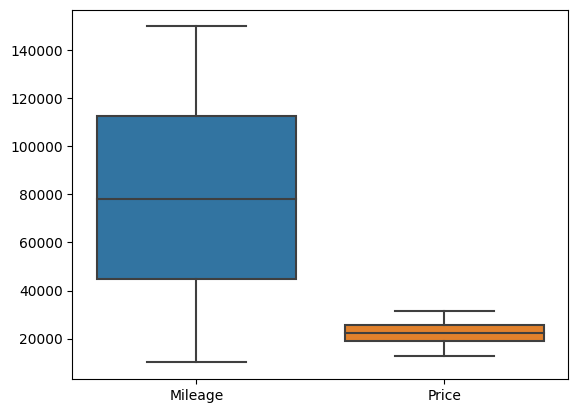

In [9]:
# check outliers
sns.boxplot(data=data)

##### There's no outliers.

In [10]:
# data sudah siap
print('setelah di cek, data sudah siap untuk masuk ke tahap selanjutnya. \n\n', data)

setelah di cek, data sudah siap untuk masuk ke tahap selanjutnya. 

           Make      Model       Year  Mileage  Condition     Price
0         Ford  Silverado 2022-01-01    18107  Excellent  19094.75
1       Toyota  Silverado 2014-01-01    13578  Excellent  27321.10
2    Chevrolet      Civic 2016-01-01    46054       Good  23697.30
3         Ford      Civic 2022-01-01    34981  Excellent  18251.05
4    Chevrolet      Civic 2019-01-01    63565  Excellent  19821.85
..         ...        ...        ...      ...        ...       ...
995     Nissan      Camry 2010-01-01   149032  Excellent  24548.50
996  Chevrolet      F-150 2014-01-01    20608  Excellent  26969.70
997       Ford     Altima 2016-01-01   109851       Good  20507.55
998     Toyota  Silverado 2010-01-01    11704       Good  31414.90
999     Nissan  Silverado 2017-01-01   128390  Excellent  18580.60

[1000 rows x 6 columns]


## **Data Modelling & Analyzing**
##### Tahap ini digunakan untuk menjawab beberapa pertanyaan yang sudah di jelaskan pada business understanding. Pertanyaannya adalah = a. Berapa banyak perusahaan yang menjual mobilnya di dealer ini?, b. Apa model mobil yang paling banyak terjual?, c. Berapa rata-rata jarak tempuh mobil yang terjual di dealer ini?, d. Bagaimana hubungan antara jarak tempuh mobil dengan harganya? gunakan metode linear regression untuk menentukan hubungannya! 

### Pertanyaan a

In [11]:
# pertanyaan a
data['Make'].unique()

array(['Ford', 'Toyota', 'Chevrolet', 'Nissan', 'Honda'], dtype=object)

##### Banyaknya perusahaan yang menjual mobilnya di dealer ini ada 5 perusahaan, yaitu Ford, Toyota, Chevrolet, Nissan, dan Honda.

### Pertanyaan b

In [12]:
# pertanyaan b
data

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022-01-01,18107,Excellent,19094.75
1,Toyota,Silverado,2014-01-01,13578,Excellent,27321.10
2,Chevrolet,Civic,2016-01-01,46054,Good,23697.30
3,Ford,Civic,2022-01-01,34981,Excellent,18251.05
4,Chevrolet,Civic,2019-01-01,63565,Excellent,19821.85
...,...,...,...,...,...,...
995,Nissan,Camry,2010-01-01,149032,Excellent,24548.50
996,Chevrolet,F-150,2014-01-01,20608,Excellent,26969.70
997,Ford,Altima,2016-01-01,109851,Good,20507.55
998,Toyota,Silverado,2010-01-01,11704,Good,31414.90


In [13]:
# model dengan penjualan terbanyak
data['Model'].value_counts()

Model
Altima       226
Camry        212
Silverado    192
F-150        188
Civic        182
Name: count, dtype: int64

##### Model Altima adalah yang paling banyak terjual, yaitu sebanyak 226 unit.

### Pertanyaan c

In [14]:
# Rata-rata tempuh mobil yang terjual di dealer
data

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022-01-01,18107,Excellent,19094.75
1,Toyota,Silverado,2014-01-01,13578,Excellent,27321.10
2,Chevrolet,Civic,2016-01-01,46054,Good,23697.30
3,Ford,Civic,2022-01-01,34981,Excellent,18251.05
4,Chevrolet,Civic,2019-01-01,63565,Excellent,19821.85
...,...,...,...,...,...,...
995,Nissan,Camry,2010-01-01,149032,Excellent,24548.50
996,Chevrolet,F-150,2014-01-01,20608,Excellent,26969.70
997,Ford,Altima,2016-01-01,109851,Good,20507.55
998,Toyota,Silverado,2010-01-01,11704,Good,31414.90


In [15]:
# menghitung rata-rata total mileage 
mean = data['Mileage'].mean()
print('rata-rata mileage mobil yang dijual di dealer adalah:', mean, 'mil')


rata-rata mileage mobil yang dijual di dealer adalah: 78796.927 mil


In [16]:
# menghitung rata-rata mileage per model mobil
mean_model = data.groupby('Model')['Mileage'].mean().sort_values(ascending=False)
print('urutan model mobil yang memiliki rata-rata mileage tertinggi adalah : \n', mean_model)

urutan model mobil yang memiliki rata-rata mileage tertinggi adalah : 
 Model
Silverado    82968.036458
Camry        81730.471698
Altima       80332.526549
F-150        74659.223404
Civic        73346.807692
Name: Mileage, dtype: float64


### Pertanyaan d

In [32]:
# see the data
data

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022-01-01,18107,Excellent,19094.75
1,Toyota,Silverado,2014-01-01,13578,Excellent,27321.10
2,Chevrolet,Civic,2016-01-01,46054,Good,23697.30
3,Ford,Civic,2022-01-01,34981,Excellent,18251.05
4,Chevrolet,Civic,2019-01-01,63565,Excellent,19821.85
...,...,...,...,...,...,...
995,Nissan,Camry,2010-01-01,149032,Excellent,24548.50
996,Chevrolet,F-150,2014-01-01,20608,Excellent,26969.70
997,Ford,Altima,2016-01-01,109851,Good,20507.55
998,Toyota,Silverado,2010-01-01,11704,Good,31414.90


In [18]:
# hanya mengambil variabel numerik
data_numerik = data[['Mileage', 'Price']]
print('ini adalah data numerik di dalam dataset ini: \n', data_numerik)

ini adalah data numerik di dalam dataset ini: 
      Mileage     Price
0      18107  19094.75
1      13578  27321.10
2      46054  23697.30
3      34981  18251.05
4      63565  19821.85
..       ...       ...
995   149032  24548.50
996    20608  26969.70
997   109851  20507.55
998    11704  31414.90
999   128390  18580.60

[1000 rows x 2 columns]


In [19]:
# melihat korelasi kedua variabel
corr = data_numerik.corr()
corr

,Mileage,Price
Mileage,1.00000,-0.45425
Price,-0.45425,1.00000


<Axes: xlabel='Mileage', ylabel='Price'>

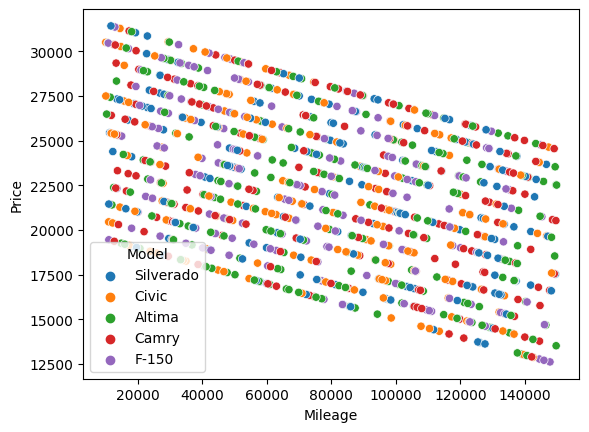

In [20]:
#
x = data_numerik['Mileage'].values.reshape(-1, 1)
y = data_numerik['Price']

sns.scatterplot(data=data, x=data['Mileage'], y=data['Price'], hue=data['Model'])

##### Dilihat dari scatter plot diatas, bisa dikatakan bahwa semakin besar mileage mobil maka harganya akan semakin turun.

In [30]:
# regresi linear
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(xtrain, ytrain)

y_pred = model.predict(xtest)
r2 = r2_score(ytest, y_pred)

koefisien model adalah : [-0.04621332]
intersep model adalah : 25785.667865377185
r2 score model adalah : 0.25722555863541374


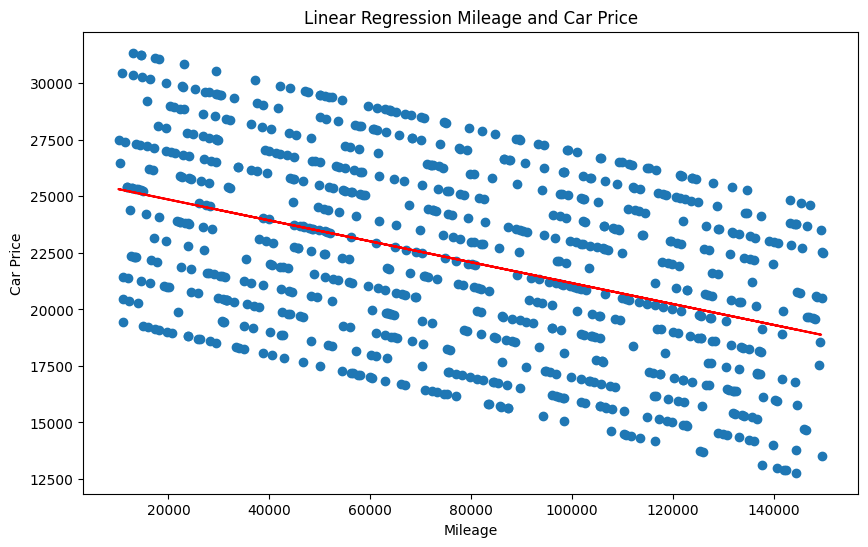

In [31]:
# visualize the result
plt.figure(figsize=(10, 6))

plt.scatter(xtrain, ytrain)
plt.plot(xtest, y_pred, color='red')
plt.title('Linear Regression Mileage and Car Price')
plt.xlabel('Mileage')
plt.ylabel('Car Price')

print('koefisien model adalah :', model.coef_)
print('intersep model adalah :', model.intercept_)
print('r2 score model adalah :', r2)